In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 

In [2]:
#Expecificamos ruta

url = r'https://raw.githubusercontent.com/cdeniaca/Group-7/refs/heads/main/Poblacion_Teletrabajo.csv'

In [3]:
#Cargamos el df

población_teletrabajo_df = pd.read_csv(url, sep=';')

In [4]:
población_teletrabajo_df

,Año,Clase de población,Comunidades y Ciudades Autónomas,Teletrabajo,Total
0,2021,Personas ocupadas,01 Andalucía,Total,3.099.104
1,2021,Personas ocupadas,01 Andalucía,Han teletrabajado,"12,8"
2,2021,Personas ocupadas,01 Andalucía,No han teletrabajado aunque su trabajo les per...,18
3,2021,Personas ocupadas,01 Andalucía,No han teletrabajado porque su trabajo no les ...,"69,2"
4,2021,Personas ocupadas,01 Andalucía,No han teletrabajado,NaN
...,...,...,...,...,...
280,2023,Personas ocupadas,19 Melilla,Total,33.715
281,2023,Personas ocupadas,19 Melilla,Han teletrabajado,"7,8"
282,2023,Personas ocupadas,19 Melilla,No han teletrabajado aunque su trabajo les per...,"22,1"
283,2023,Personas ocupadas,19 Melilla,No han teletrabajado porque su trabajo no les ...,"70,1"


In [5]:
# Reemplazamos el punto por una cadena vacía para eliminar el separador de miles
población_teletrabajo_df['Total'] = población_teletrabajo_df['Total'].str.replace('.', '', regex=False)

# Reemplazamos la coma por un punto para que pandas pueda interpretarlo como decimal
población_teletrabajo_df['Total'] = población_teletrabajo_df['Total'].str.replace(',', '.', regex=False)

In [6]:
# Convertimos la columna a tipo numérico
población_teletrabajo_df['Total'] = pd.to_numeric(población_teletrabajo_df['Total'], errors='coerce')


In [7]:
# Quitar el texto hasta el primer espacio, pero solo si existe un espacio

#población_teletrabajo_df['Comunidades y Ciudades Autónomas'] = población_teletrabajo_df['Comunidades y Ciudades Autónomas'].apply(
    #lambda x: x.split(' ', 1)[1] if ' ' in x else x)

población_teletrabajo_df['Comunidades y Ciudades Autónomas'] = población_teletrabajo_df['Comunidades y Ciudades Autónomas'].apply(
    lambda x: x[3:]
)


In [8]:
población_teletrabajo_df

,Año,Clase de población,Comunidades y Ciudades Autónomas,Teletrabajo,Total
0,2021,Personas ocupadas,Andalucía,Total,3099104.0
1,2021,Personas ocupadas,Andalucía,Han teletrabajado,12.8
2,2021,Personas ocupadas,Andalucía,No han teletrabajado aunque su trabajo les per...,18.0
3,2021,Personas ocupadas,Andalucía,No han teletrabajado porque su trabajo no les ...,69.2
4,2021,Personas ocupadas,Andalucía,No han teletrabajado,NaN
...,...,...,...,...,...
280,2023,Personas ocupadas,Melilla,Total,33715.0
281,2023,Personas ocupadas,Melilla,Han teletrabajado,7.8
282,2023,Personas ocupadas,Melilla,No han teletrabajado aunque su trabajo les per...,22.1
283,2023,Personas ocupadas,Melilla,No han teletrabajado porque su trabajo no les ...,70.1


In [9]:
# Muestra los tipos de datos de cada columna
print(población_teletrabajo_df.dtypes)

Año                                   int64
Clase de población                   object
Comunidades y Ciudades Autónomas     object
Teletrabajo                          object
Total                               float64
dtype: object


In [10]:
# Elimina filas donde 'Total' tenga NaN
población_teletrabajo_df = población_teletrabajo_df.dropna(subset=['Total'])
#población_teletrabajo_df['Total'] = población_teletrabajo_df['Total'].fillna(0)


In [11]:
población_teletrabajo_df.rename(columns={'Comunidades y Ciudades Autónomas': 'Comunidad autónoma'}, inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_21772\1806929769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  población_teletrabajo_df.rename(columns={'Comunidades y Ciudades Autónomas': 'Comunidad autónoma'}, inplace=True)


In [12]:
población_teletrabajo_df.rename(columns={'Año': 'AÑO'}, inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_21772\3681827578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  población_teletrabajo_df.rename(columns={'Año': 'AÑO'}, inplace=True)


In [13]:
print(población_teletrabajo_df['Comunidad autónoma'].unique())


['Andalucía' 'Aragón' 'Asturias, Principado de' 'Balears, Illes'
 'Canarias' 'Cantabria' 'Castilla y León' 'Castilla - La Mancha'
 'Cataluña' 'Comunitat Valenciana' 'Extremadura' 'Galicia'
 'Madrid, Comunidad de' 'Murcia, Región de' 'Navarra, Comunidad Foral de'
 'País Vasco' 'Rioja, La' 'Ceuta' 'Melilla']


In [14]:
print(población_teletrabajo_df['Teletrabajo'].unique())

['Total' 'Han teletrabajado'
 'No han teletrabajado aunque su trabajo les permitiría teletrabajar'
 'No han teletrabajado porque su trabajo no les permitiría teletrabajar']


In [15]:
print(población_teletrabajo_df['AÑO'].unique())

[2021 2022 2023]


In [16]:
población_teletrabajo_df

,AÑO,Clase de población,Comunidad autónoma,Teletrabajo,Total
0,2021,Personas ocupadas,Andalucía,Total,3099104.0
1,2021,Personas ocupadas,Andalucía,Han teletrabajado,12.8
2,2021,Personas ocupadas,Andalucía,No han teletrabajado aunque su trabajo les per...,18.0
3,2021,Personas ocupadas,Andalucía,No han teletrabajado porque su trabajo no les ...,69.2
5,2021,Personas ocupadas,Aragón,Total,562131.0
...,...,...,...,...,...
278,2023,Personas ocupadas,Ceuta,No han teletrabajado porque su trabajo no les ...,87.8
280,2023,Personas ocupadas,Melilla,Total,33715.0
281,2023,Personas ocupadas,Melilla,Han teletrabajado,7.8
282,2023,Personas ocupadas,Melilla,No han teletrabajado aunque su trabajo les per...,22.1


In [17]:
# Crear un DataFrame pivotado
df_pivot_teletrabajo = pd.pivot_table(
    población_teletrabajo_df,
    index=['AÑO', 'Comunidad autónoma'],  # Asegúrate de usar el nombre correcto
    columns='Teletrabajo',
    values='Total',
    aggfunc='sum',
    fill_value=0
)


In [18]:
# Restablecer el índice para convertirlo en columnas regulares
df_pivot_teletrabajo = df_pivot_teletrabajo.reset_index()

In [19]:
# Multiplicación y división para calcular valores absolutos basados en porcentajes
df_pivot_teletrabajo['Han teletrabajado'] = df_pivot_teletrabajo['Han teletrabajado'] * df_pivot_teletrabajo['Total'] / 100
df_pivot_teletrabajo['No han teletrabajado aunque su trabajo les permitiría teletrabajar'] = df_pivot_teletrabajo['No han teletrabajado aunque su trabajo les permitiría teletrabajar'] * df_pivot_teletrabajo['Total'] / 100
df_pivot_teletrabajo['No han teletrabajado porque su trabajo no les permitiría teletrabajar'] = df_pivot_teletrabajo['No han teletrabajado porque su trabajo no les permitiría teletrabajar'] * df_pivot_teletrabajo['Total'] / 100

In [20]:
df_pivot_teletrabajo = df_pivot_teletrabajo[['AÑO', 'Comunidad autónoma', 'Han teletrabajado', 'No han teletrabajado aunque su trabajo les permitiría teletrabajar', 'No han teletrabajado porque su trabajo no les permitiría teletrabajar']]


In [21]:
# Dividir las columnas seleccionadas entre 1000 para cambiar de millones a miles
columnas_a_convertir = [
    'No han teletrabajado aunque su trabajo les permitiría teletrabajar',
    'Han teletrabajado',
    'No han teletrabajado porque su trabajo no les permitiría teletrabajar'
]

# Realizar la conversión
df_pivot_teletrabajo[columnas_a_convertir] = df_pivot_teletrabajo[columnas_a_convertir] / 1000


In [22]:
df_pivot_teletrabajo

Teletrabajo,AÑO,Comunidad autónoma,Han teletrabajado,No han teletrabajado aunque su trabajo les permitiría teletrabajar,No han teletrabajado porque su trabajo no les permitiría teletrabajar
0,2021,Andalucía,396.685312,557.838720,2144.579968
1,2021,Aragón,70.266375,96.686532,395.178093
2,2021,"Asturias, Principado de",42.925218,70.035882,263.199363
3,2021,"Balears, Illes",41.821099,91.053532,396.506369
4,2021,Canarias,123.349465,115.391435,557.062100
5,2021,Cantabria,15.171618,47.353838,167.347544
6,2021,Castilla - La Mancha,67.615158,134.363455,664.882387
7,2021,Castilla y León,96.926502,135.508896,708.598602
8,2021,Cataluña,761.122908,484.646638,2006.892454
9,2021,Ceuta,1.366683,9.725237,8.715080


In [23]:
media_por_año = df_pivot_teletrabajo.groupby('AÑO')[[
    'No han teletrabajado aunque su trabajo les permitiría teletrabajar',
    'Han teletrabajado',
    'No han teletrabajado porque su trabajo no les permitiría teletrabajar'
]].mean().reset_index()

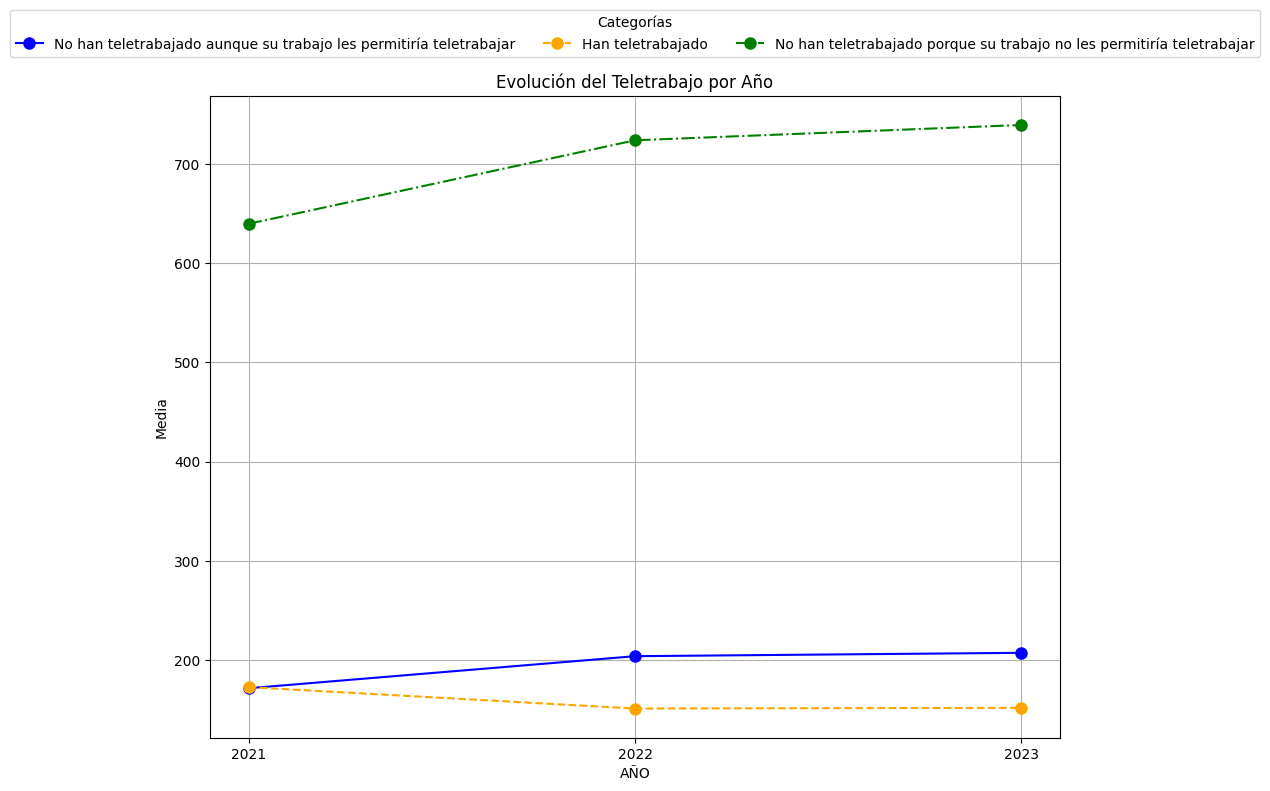

In [24]:
# Configuración del gráfico
plt.figure(figsize=(12, 8))

# Estilos y colores para las líneas
estilos = ['-o', '--o', '-.o']  # Diferentes estilos de línea
colores = ['blue', 'orange', 'green']  # Colores para cada línea

# Plotear cada columna en la gráfica
for i, column in enumerate(media_por_año.columns[1:]):  # Ignorar la primera columna que es 'AÑO'
    plt.plot(media_por_año['AÑO'], media_por_año[column], estilos[i], color=colores[i], markersize=8, label=column)

# Configurar el gráfico
plt.title('Evolución del Teletrabajo por Año')
plt.xlabel('AÑO')
plt.ylabel('Media')

plt.xticks(media_por_año['AÑO'])  # Asegurarse de que todos los años se muestren en el eje X
plt.legend(title='Categorías', bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=3)  # Leyenda centrada en la parte superior
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [25]:
df_pivot_teletrabajo

Teletrabajo,AÑO,Comunidad autónoma,Han teletrabajado,No han teletrabajado aunque su trabajo les permitiría teletrabajar,No han teletrabajado porque su trabajo no les permitiría teletrabajar
0,2021,Andalucía,396.685312,557.838720,2144.579968
1,2021,Aragón,70.266375,96.686532,395.178093
2,2021,"Asturias, Principado de",42.925218,70.035882,263.199363
3,2021,"Balears, Illes",41.821099,91.053532,396.506369
4,2021,Canarias,123.349465,115.391435,557.062100
5,2021,Cantabria,15.171618,47.353838,167.347544
6,2021,Castilla - La Mancha,67.615158,134.363455,664.882387
7,2021,Castilla y León,96.926502,135.508896,708.598602
8,2021,Cataluña,761.122908,484.646638,2006.892454
9,2021,Ceuta,1.366683,9.725237,8.715080
